In [1]:
import psycopg2

import numpy as np
import pandas as pd
import itertools

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 8]

from pprint import pprint
from collections import OrderedDict

try:
  con
except NameError:
  con = psycopg2.connect(user="postgres", dbname="clouddb", password="coap")
  con.set_session(readonly=True, autocommit=True)

In [2]:
%%time 

exp_data_sql = """
SELECT
	ex.*
FROM
	experiment ex
"""
exp_df = pd.read_sql_query(exp_data_sql, con)
print("\n".join(exp_df.exp_id.unique().tolist()))
print()
exp_df

cloud_proxy_and_attacker_noattacker
cloud_proxy_and_attacker_noattacker_httpson
cloud_proxy_and_attacker_noattacker_dtlson
cloud_proxy_and_attacker_noattacker_dtlson_httpson
cloud_proxy_and_attacker_withattacker
cloud_proxy_and_attacker_withattacker_dtlson
cloud_proxy_and_attacker_withattacker_dtlson_httpson
cloud_proxy_and_attacker_withattacker_httpson
cloud_proxy_and_500mbpsattacker_withattacker_dtlson_httpson
cloud_proxy_and_500mbpsattacker_withattacker
cloud_proxy_and_500mbpsattacker_withattacker_httpson
cloud_proxy_and_500mbpsattacker_withattacker_dtlson

CPU times: user 11.7 ms, sys: 1.6 ms, total: 13.3 ms
Wall time: 13.6 ms


/home/ubuntu/.local/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,exp_id,attacker_rate,server_connections,max_keep_alive_requests,num_clients,num_trials,origin_server_duration,attacker_duration,receiver_duration,proxy_duration,...,topology_name,num_proxy_connections,request_timeout,max_retries,keep_alive_duration,request_retry_interval,reuse_connections,run_proxy_with_dtls,run_proxy_with_https,run_attacker
0,cloud_proxy_and_attacker_noattacker,100mbps,256,0,1,3,120,20,120,120,...,cloud_proxy_cloud_attacker,50,5,2,5,1,True,False,False,False
1,cloud_proxy_and_attacker_noattacker_httpson,100mbps,256,0,1,3,120,20,120,120,...,cloud_proxy_cloud_attacker,50,5,2,5,1,True,False,True,False
2,cloud_proxy_and_attacker_noattacker_dtlson,100mbps,256,0,1,3,120,20,120,120,...,cloud_proxy_cloud_attacker,50,5,2,5,1,True,True,False,False
3,cloud_proxy_and_attacker_noattacker_dtlson_htt...,100mbps,256,0,1,3,120,20,120,120,...,cloud_proxy_cloud_attacker,50,5,2,5,1,True,True,True,False
4,cloud_proxy_and_attacker_withattacker,100mbps,256,0,1,3,120,20,120,120,...,cloud_proxy_cloud_attacker,50,5,2,5,1,True,False,False,True
5,cloud_proxy_and_attacker_withattacker_dtlson,100mbps,256,0,1,3,120,20,120,120,...,cloud_proxy_cloud_attacker,50,5,2,5,1,True,True,False,True
6,cloud_proxy_and_attacker_withattacker_dtlson_h...,100mbps,256,0,1,3,120,20,120,120,...,cloud_proxy_cloud_attacker,50,5,2,5,1,True,True,True,True
7,cloud_proxy_and_attacker_withattacker_httpson,100mbps,256,0,1,3,120,20,120,120,...,cloud_proxy_cloud_attacker,50,5,2,5,1,True,False,True,True
8,cloud_proxy_and_500mbpsattacker_withattacker_d...,500mbps,256,0,1,3,120,20,120,120,...,cloud_proxy_cloud_attacker,50,5,2,5,1,True,True,True,True
9,cloud_proxy_and_500mbpsattacker_withattacker,500mbps,256,0,1,3,120,20,120,120,...,cloud_proxy_cloud_attacker,50,5,2,5,1,True,False,False,True


In [3]:
%%time 

fetch_metadata_sql = """
SELECT
	n.node_name,
	dn.dnid,
	dn.node_id
FROM 
	deployed_node dn
	JOIN node n ON n.node_id = dn.node_id
"""

metadata_df = pd.read_sql_query(fetch_metadata_sql, con)

dnid_map_node_name = dict()
node_id_map_node_name = dict()

for record in metadata_df.to_dict(orient="records"):
  dnid = record["dnid"]
  node_id = record["node_id"]
  node_name = record["node_name"]
  
  assert dnid not in dnid_map_node_name
  dnid_map_node_name[dnid] = node_name
  
  if node_id in node_id_map_node_name:
    assert node_id_map_node_name[node_id] == node_name
  else:
    node_id_map_node_name[node_id] = node_name
  
client_dnids = set(dnid for dnid, node_name in dnid_map_node_name.items() if node_name.startswith("client"))
attacker_dnids = set(dnid for dnid, node_name in dnid_map_node_name.items() if node_name.startswith("attacker"))

client_node_ids = set(node_id for node_id, node_name in node_id_map_node_name.items() if node_name.startswith("client"))

print(f"{client_dnids=}")
print(f"{attacker_dnids=}")
print(f"{client_node_ids=}")

client_dnids={32, 2, 37, 7, 42, 12, 47, 17, 52, 22, 57, 27}
attacker_dnids={1, 36, 6, 41, 10, 46, 16, 51, 21, 56, 26, 31}
client_node_ids={2}
CPU times: user 2.34 ms, sys: 3.82 ms, total: 6.17 ms
Wall time: 6.96 ms


/home/ubuntu/.local/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [4]:
%%time

client_messages_sql = f"""
SELECT
	dn.exp_id,
	client_sends.trial,
	client_sends.observer_id,
	client_sends.message_marker,
	(ARRAY_AGG(cm_recvs.coap_code))[1] AS response_code,
	MIN(client_sends.observe_timestamp) AS send_time_sec,
	MIN(client_recvs.observe_timestamp) AS recv_time_sec,
	MIN(client_sends.observe_timestamp) AS first_send_time_sec,
	MAX(client_sends.observe_timestamp) AS last_send_time_sec,
	MIN(client_recvs.observe_timestamp) AS first_recv_time_sec,
	MAX(client_recvs.observe_timestamp) AS last_recv_time_sec,
	1e3 * (MIN(client_recvs.observe_timestamp) - MIN(client_sends.observe_timestamp)) AS rtt_ms_first_transmission,
	1e3 * (MIN(client_recvs.observe_timestamp) - MAX(client_sends.observe_timestamp)) AS rtt_ms_last_transmission,
	COUNT(client_sends.*) AS num_send_observations,
	COUNT(client_recvs.*) AS num_recv_observations,
	SUM(CASE WHEN cm_send.coap_retransmitted = true THEN 1 ELSE 0 END) AS num_retransmissions
FROM
	event client_sends
		JOIN message m_sends ON m_sends.message_id = client_sends.message_id
			JOIN coap_message cm_send ON cm_send.cmci = m_sends.coap_message
	JOIN event client_recvs
		ON client_recvs.trial = client_sends.trial
		AND client_recvs.observer_id = client_sends.observer_id
		AND client_recvs.message_marker = client_sends.message_marker
		JOIN message m_recvs ON m_recvs.message_id = client_recvs.message_id
			JOIN coap_message cm_recvs ON cm_recvs.cmci = m_recvs.coap_message
	JOIN deployed_node dn 
		ON (dn.dnid = client_sends.observer_id AND dn.dnid = client_recvs.observer_id)
WHERE
	client_sends.observer_id IN ({','.join(map(str, client_dnids))})     -- clients senders are observers (observer ID)
		AND m_sends.src_id IN ({','.join(map(str, client_node_ids))})    -- clients are senders (node ID)
	AND client_recvs.observer_id IN ({','.join(map(str, client_dnids))}) -- clients receivers are observers (observer ID)
		AND m_recvs.dst_id IN ({','.join(map(str, client_node_ids))})    -- clients are receivers (node ID)
GROUP BY
	dn.exp_id, client_sends.trial, client_sends.observer_id, client_sends.message_marker
ORDER BY
	dn.exp_id, client_sends.trial, client_sends.observer_id, client_sends.message_marker
"""

message_rtt_df = pd.read_sql_query(client_messages_sql, con)
message_rtt_df.observer_id.replace(dnid_map_node_name, inplace=True)

message_rtt_df["successful_message"] = False
message_rtt_df.loc[(message_rtt_df["response_code"] == "content"), "successful_message"] = True

print(message_rtt_df["response_code"].unique())

message_rtt_df

/home/ubuntu/.local/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


['content' 'bad_gateway']
CPU times: user 595 ms, sys: 75.2 ms, total: 670 ms
Wall time: 1.68 s


,exp_id,trial,observer_id,message_marker,response_code,send_time_sec,recv_time_sec,first_send_time_sec,last_send_time_sec,first_recv_time_sec,last_recv_time_sec,rtt_ms_first_transmission,rtt_ms_last_transmission,num_send_observations,num_recv_observations,num_retransmissions,successful_message
0,cloud_proxy_and_500mbpsattacker_withattacker,1,client1,1,content,0.000000,0.207288,0.000000,0.000000,0.207288,0.207288,207.288027,207.288027,1,1,0,True
1,cloud_proxy_and_500mbpsattacker_withattacker,1,client1,2,content,0.231558,0.288233,0.231558,0.231558,0.288233,0.288233,56.674957,56.674957,1,1,0,True
2,cloud_proxy_and_500mbpsattacker_withattacker,1,client1,3,content,0.290401,0.346598,0.290401,0.290401,0.346598,0.346598,56.197166,56.197166,1,1,0,True
3,cloud_proxy_and_500mbpsattacker_withattacker,1,client1,4,content,0.348780,0.404318,0.348780,0.348780,0.404318,0.404318,55.537939,55.537939,1,1,0,True
4,cloud_proxy_and_500mbpsattacker_withattacker,1,client1,5,content,0.406691,0.462530,0.406691,0.406691,0.462530,0.462530,55.839062,55.839062,1,1,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57512,cloud_proxy_and_attacker_withattacker_httpson,3,client1,518419,content,98.384405,98.437136,98.384405,98.384405,98.437136,98.437136,52.731037,52.731037,1,1,0,True
57513,cloud_proxy_and_attacker_withattacker_httpson,3,client1,518420,content,98.437647,98.490177,98.437647,98.437647,98.490177,98.490177,52.530050,52.530050,1,1,0,True
57514,cloud_proxy_and_attacker_withattacker_httpson,3,client1,518421,content,98.490717,98.543373,98.490717,98.490717,98.543373,98.543373,52.655935,52.655935,1,1,0,True
57515,cloud_proxy_and_attacker_withattacker_httpson,3,client1,518422,content,98.543918,98.596621,98.543918,98.543918,98.596621,98.596621,52.702904,52.702904,1,1,0,True


In [25]:
%%time

metric_usage_sql = f"""
SELECT
	dn.exp_id,
	nm.trial,
	nm.observer_id,
	nm.metric_type,
	AVG(nm.metric_value) AS avg_value,
	MIN(nm.metric_value) AS min_value,
	MAX(nm.metric_value) AS max_value
FROM
	node_metric nm
	JOIN deployed_node dn ON dn.dnid = nm.observer_id
GROUP BY
	dn.exp_id, nm.trial, nm.observer_id, nm.metric_type
ORDER BY
	dn.exp_id, nm.trial, nm.metric_type, nm.observer_id
"""

metric_df = pd.read_sql_query(metric_usage_sql, con)

metric_df

CPU times: user 33 ms, sys: 14.5 ms, total: 47.5 ms
Wall time: 127 ms


,exp_id,trial,observer_id,metric_type,avg_value,min_value,max_value
0,cloud_proxy_and_500mbpsattacker_withattacker,1,48,cpu_utilization,3.719167,0.4,18.7
1,cloud_proxy_and_500mbpsattacker_withattacker,1,49,cpu_utilization,12.130833,0.4,90.3
2,cloud_proxy_and_500mbpsattacker_withattacker,1,48,memory_utilization,241.065511,218.0,264.0
3,cloud_proxy_and_500mbpsattacker_withattacker,1,49,memory_utilization,3168.908738,222.0,4542.0
4,cloud_proxy_and_500mbpsattacker_withattacker,2,48,cpu_utilization,3.910000,0.5,19.0
...,...,...,...,...,...,...,...
139,cloud_proxy_and_attacker_withattacker_httpson,2,39,memory_utilization,3372.696498,245.0,4845.0
140,cloud_proxy_and_attacker_withattacker_httpson,3,38,cpu_utilization,4.090000,0.5,23.7
141,cloud_proxy_and_attacker_withattacker_httpson,3,39,cpu_utilization,13.452500,0.5,92.7
142,cloud_proxy_and_attacker_withattacker_httpson,3,38,memory_utilization,270.148649,250.0,291.0


In [32]:
%%time

client_rps_df = (
  message_rtt_df
  .groupby(by=["exp_id", "trial", "observer_id"])
  .aggregate(
    num_messages=("successful_message", "count"),
    num_successful_messages=("successful_message", "sum"),
    num_retransmissions=("num_retransmissions", "sum"),
    stddev_rtt_ms=("rtt_ms_first_transmission", "std"),
    min_rtt_ms=("rtt_ms_first_transmission", "min"),
    median_rtt_ms=("rtt_ms_first_transmission", "median"),
    max_rtt_ms=("rtt_ms_first_transmission", "max"),
    rtt_ms_p0=("rtt_ms_first_transmission", lambda s : pd.Series.quantile(s, q=0.00)),
    rtt_ms_p25=("rtt_ms_first_transmission", lambda s : pd.Series.quantile(s, q=0.25)),
    rtt_ms_p50=("rtt_ms_first_transmission", lambda s : pd.Series.quantile(s, q=0.50)),
    rtt_ms_p75=("rtt_ms_first_transmission", lambda s : pd.Series.quantile(s, q=0.75)),
    rtt_ms_p99=("rtt_ms_first_transmission", lambda s : pd.Series.quantile(s, q=0.99)),
    rtt_ms_p100=("rtt_ms_first_transmission", lambda s : pd.Series.quantile(s, q=1.00)),
    first_active_time=("first_send_time_sec", "min"),
    last_active_time=("last_recv_time_sec", "max"),
  )
  .reset_index()
)
assert client_rps_df["min_rtt_ms"].eq(client_rps_df["rtt_ms_p0"]).all()
assert client_rps_df["median_rtt_ms"].eq(client_rps_df["rtt_ms_p50"]).all()
assert client_rps_df["max_rtt_ms"].eq(client_rps_df["rtt_ms_p100"]).all()

client_rps_df["num_failed_messages"] = client_rps_df["num_messages"] - client_rps_df["num_successful_messages"]
client_rps_df["average_rps"] = client_rps_df["num_successful_messages"] / (client_rps_df["last_active_time"] - client_rps_df["first_active_time"])

client_rps_df = client_rps_df.merge(exp_df, on="exp_id")
bool_col_replacement = {
  "run_proxy_with_dtls": {True: "dtls", False: "coap"},
  "run_proxy_with_https": {True: "https", False: "http"},
  "reuse_connections": {True: "reuse-connections", False: "no-connection-reuse"},
  "run_attacker": {True: "attacker", False: "no-attacker"},
}
client_rps_df.replace(bool_col_replacement, inplace=True)

client_rps_df

CPU times: user 276 ms, sys: 3.6 ms, total: 279 ms
Wall time: 276 ms


,exp_id,trial,observer_id,num_messages,num_successful_messages,num_retransmissions,stddev_rtt_ms,min_rtt_ms,median_rtt_ms,max_rtt_ms,...,topology_name,num_proxy_connections,request_timeout,max_retries,keep_alive_duration,request_retry_interval,reuse_connections,run_proxy_with_dtls,run_proxy_with_https,run_attacker
0,cloud_proxy_and_500mbpsattacker_withattacker,1,client1,1347,1343,5,316.732743,52.052975,52.618027,7602.551937,...,cloud_proxy_cloud_attacker,50,5,2,5,1,reuse-connections,coap,http,attacker
1,cloud_proxy_and_500mbpsattacker_withattacker,2,client1,1374,1372,4,393.023881,52.093029,52.622914,12678.251028,...,cloud_proxy_cloud_attacker,50,5,2,5,1,reuse-connections,coap,http,attacker
2,cloud_proxy_and_500mbpsattacker_withattacker,3,client1,1372,1371,4,310.743933,51.940918,52.616000,8044.008970,...,cloud_proxy_cloud_attacker,50,5,2,5,1,reuse-connections,coap,http,attacker
3,cloud_proxy_and_500mbpsattacker_withattacker_d...,1,client1,1599,1599,2,224.289304,51.674128,52.734852,8975.060940,...,cloud_proxy_cloud_attacker,50,5,2,5,1,reuse-connections,dtls,http,attacker
4,cloud_proxy_and_500mbpsattacker_withattacker_d...,2,client1,1548,1548,3,240.340352,51.956177,52.793026,9089.024067,...,cloud_proxy_cloud_attacker,50,5,2,5,1,reuse-connections,dtls,http,attacker
5,cloud_proxy_and_500mbpsattacker_withattacker_d...,3,client1,1578,1578,2,234.061726,51.681995,52.734137,9309.669971,...,cloud_proxy_cloud_attacker,50,5,2,5,1,reuse-connections,dtls,http,attacker
6,cloud_proxy_and_500mbpsattacker_withattacker_d...,1,client1,1595,1595,3,169.729161,51.757097,52.882910,6310.120106,...,cloud_proxy_cloud_attacker,50,5,2,5,1,reuse-connections,dtls,https,attacker
7,cloud_proxy_and_500mbpsattacker_withattacker_d...,2,client1,1545,1545,3,147.143849,51.714897,52.839041,4210.739851,...,cloud_proxy_cloud_attacker,50,5,2,5,1,reuse-connections,dtls,https,attacker
8,cloud_proxy_and_500mbpsattacker_withattacker_d...,3,client1,1555,1555,3,233.143405,51.766157,52.843094,8908.905029,...,cloud_proxy_cloud_attacker,50,5,2,5,1,reuse-connections,dtls,https,attacker
9,cloud_proxy_and_500mbpsattacker_withattacker_h...,1,client1,1555,1555,3,221.546748,51.675081,52.836180,8294.707060,...,cloud_proxy_cloud_attacker,50,5,2,5,1,reuse-connections,dtls,https,attacker


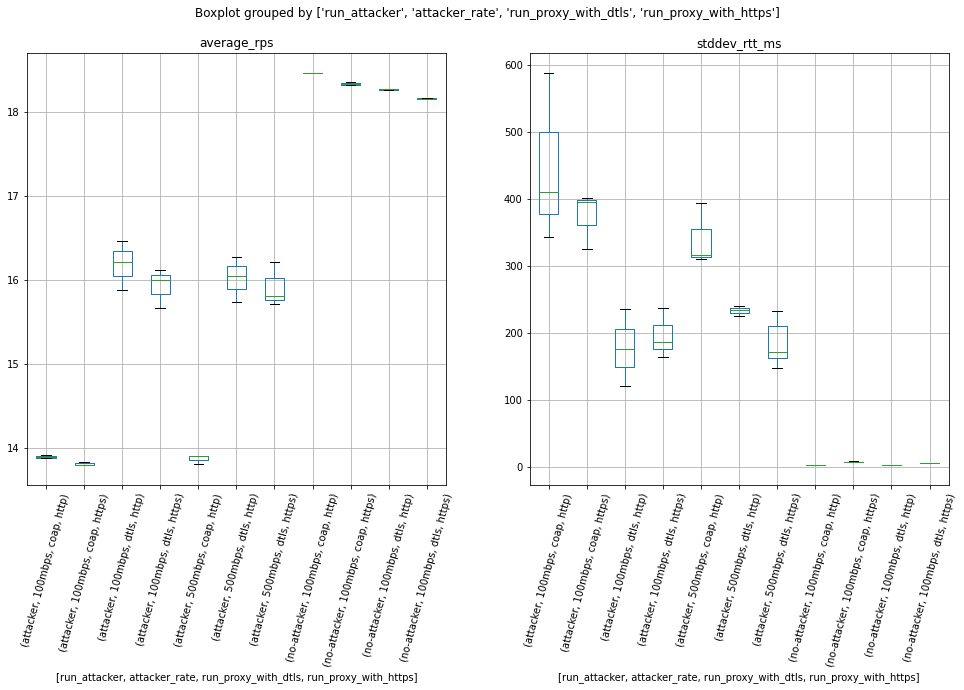

In [33]:
df = client_rps_df
param_comparison_scope = ["run_attacker", "attacker_rate", "run_proxy_with_dtls", "run_proxy_with_https"]

plot_args = {
  "rot": 75,
  "by": param_comparison_scope,
}

plots = ["average_rps", "stddev_rtt_ms"]
_, axes = plt.subplots(1, len(plots))
for i, p in enumerate(plots):
  df.boxplot(p, ax=axes[i], **plot_args)

plt.show()

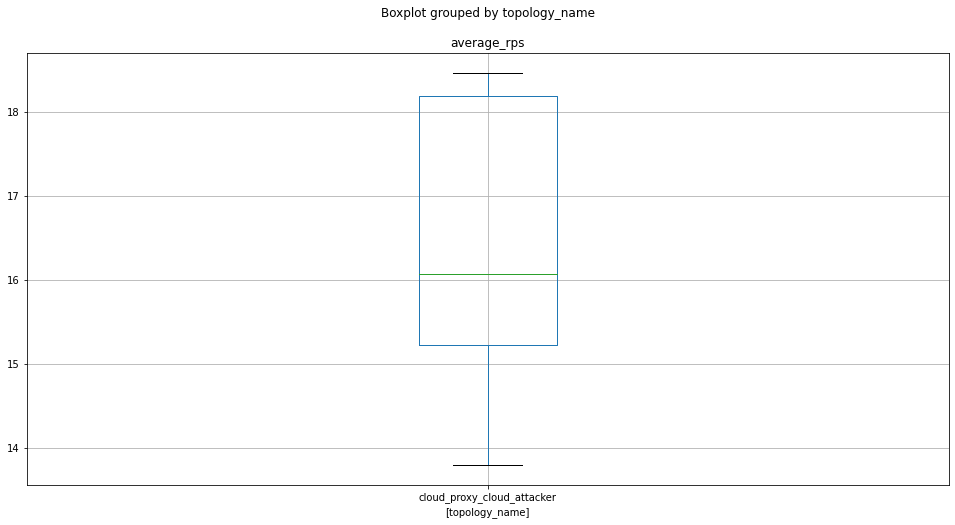

In [13]:
param_comparison_scope = ["topology_name"]

ax = None
ax = df.boxplot("average_rps", by=param_comparison_scope, ax=ax)
plt.show()

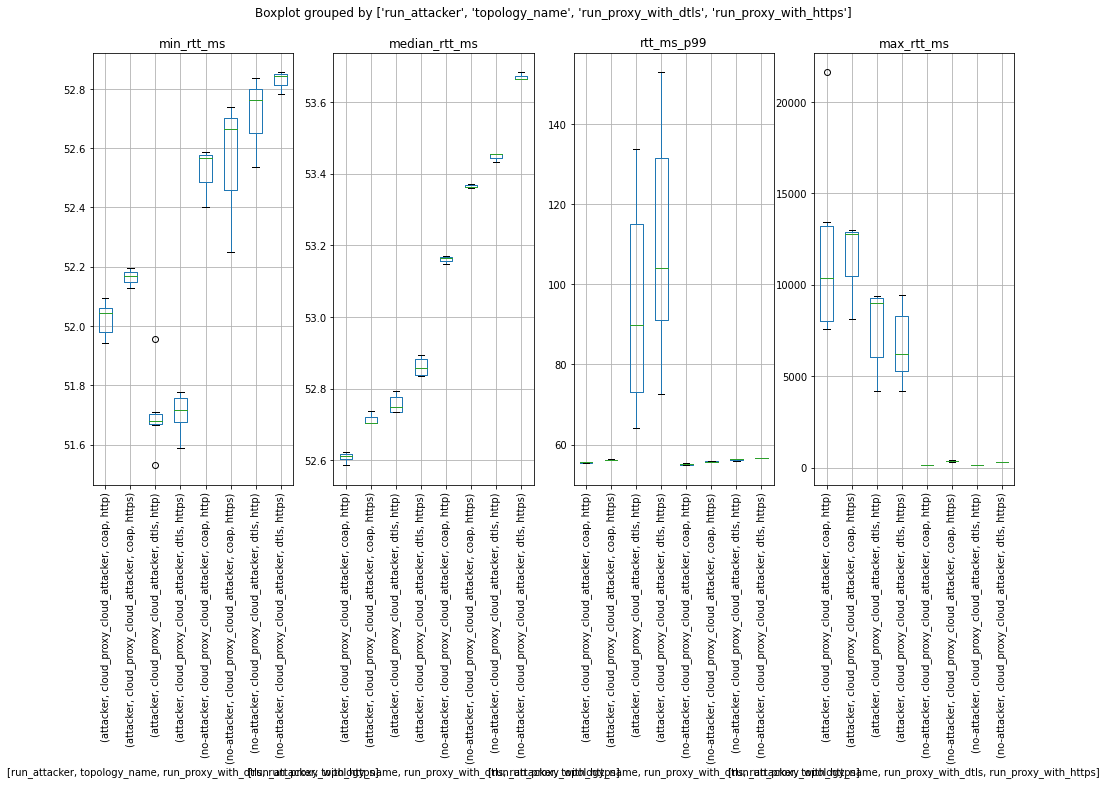

In [18]:
param_comparison_scope = ["run_attacker", "topology_name", "run_proxy_with_dtls", "run_proxy_with_https"]

plot_args = {
  "by": param_comparison_scope,
  "rot": 90,
}

_, axes = plt.subplots(1, 4)

df.boxplot("min_rtt_ms", ax=axes[0], **plot_args)
df.boxplot("median_rtt_ms", ax=axes[1], **plot_args)
df.boxplot("rtt_ms_p99", ax=axes[2], **plot_args)
df.boxplot("max_rtt_ms", ax=axes[3], **plot_args)

plt.show()